In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarning("ignor")

In [4]:
df=pd.read_excel("Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

#### Checking shape

In [6]:
df.shape

(10683, 11)

#### Checking null values

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### Basic information of data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### Find tha unique values

In [9]:
for i in df.columns:    # ambiguity ##in destination column we han=ve change tha delhi into new delhi
    print(i,"---",df[i].unique())

Airline --- ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Date_of_Journey --- ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Source --- ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination --- ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Route --- ['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → CO

#### Checking missing values again

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### Filling missing values in data

In [11]:
df["Total_Stops"].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [12]:
df["Route"].mode()

0    DEL → BOM → COK
Name: Route, dtype: object

In [13]:
##df.fillna(columns=["["Route"])

In [14]:
df["Route"].fillna(df["Route"].mode()[0],inplace=True)

In [15]:
df["Total_Stops"].fillna(df["Total_Stops"].mode()[0],inplace=True)

In [16]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#### Replacing new delhi into delhi in data

In [18]:
df["Destination"]=df["Destination"].replace(["New Delhi","Delhi"])
df["Destination"]

0        New Delhi
1         Banglore
2           Cochin
3         Banglore
4         Banglore
           ...    
10678     Banglore
10679     Banglore
10680     Banglore
10681     Banglore
10682       Cochin
Name: Destination, Length: 10683, dtype: object

In [19]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

#### from df.info  we see that date_of_journey ,dep_time and arrival_time all are object types.

In [20]:
from datetime import datetime as dt

In [21]:
df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"])
df["Dep_Time"]=pd.to_datetime(df["Dep_Time"])
df["Arrival_Time"]=pd.to_datetime(df["Arrival_Time"])

C:\Users\ad\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ad\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ad\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ad\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_date

In [22]:
from datetime import datetime as dt
# Extracting  day 
df["day_of_journey"] = df["Date_of_Journey"].dt.day

# Extracting month
df["month_of_journey"] = df["Date_of_Journey"].dt.month

## Extracting  departure Hours
df["Dep_hour"] = df["Dep_Time"].dt.hour

# Extracting departure Minutes
df["Dep_min"] = df["Dep_Time"].dt.minute

## Extracting  arrival Hours
df["arrival_hour"] = df["Arrival_Time"].dt.hour

# Extracting arrival Minutes
df["arrival_min"] = df["Arrival_Time"].dt.minute





#### CLEAN DURATION COLUMN

In [23]:
df["Duration"].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [24]:
df["Duration"]=df["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

In [25]:
df["Duration"]

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10683, dtype: int64

In [26]:
df #.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-04-05 22:20:00,2023-03-22 01:10:00,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-04-05 05:50:00,2023-04-05 13:15:00,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-04-05 09:25:00,2023-06-10 04:25:00,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-04-05 18:05:00,2023-04-05 23:30:00,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-01-03,Banglore,Banglore,BLR → NAG → DEL,2023-04-05 16:50:00,2023-04-05 21:35:00,285,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2023-04-05 19:55:00,2023-04-05 22:25:00,150,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2023-04-05 20:45:00,2023-04-05 23:20:00,155,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,2019-04-27,Banglore,Banglore,BLR → DEL,2023-04-05 08:20:00,2023-04-05 11:20:00,180,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,2019-01-03,Banglore,Banglore,BLR → DEL,2023-04-05 11:30:00,2023-04-05 14:10:00,160,non-stop,No info,12648,3,1,11,30,14,10


####  do encoding on "total_stopa" column

In [28]:
df.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [29]:
df.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time            datetime64[ns]
Arrival_Time        datetime64[ns]
Duration                     int64
Total_Stops                  int64
Additional_Info             object
Price                        int64
day_of_journey               int64
month_of_journey             int64
Dep_hour                     int64
Dep_min                      int64
arrival_hour                 int64
arrival_min                  int64
dtype: object

In [30]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-04-05 22:20:00,2023-03-22 01:10:00,170,0,No info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-04-05 05:50:00,2023-04-05 13:15:00,445,2,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-04-05 09:25:00,2023-06-10 04:25:00,1140,2,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-04-05 18:05:00,2023-04-05 23:30:00,325,1,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-01-03,Banglore,Banglore,BLR → NAG → DEL,2023-04-05 16:50:00,2023-04-05 21:35:00,285,1,No info,13302,3,1,16,50,21,35


In [31]:
df.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time            datetime64[ns]
Arrival_Time        datetime64[ns]
Duration                     int64
Total_Stops                  int64
Additional_Info             object
Price                        int64
day_of_journey               int64
month_of_journey             int64
Dep_hour                     int64
Dep_min                      int64
arrival_hour                 int64
arrival_min                  int64
dtype: object

### Correlation

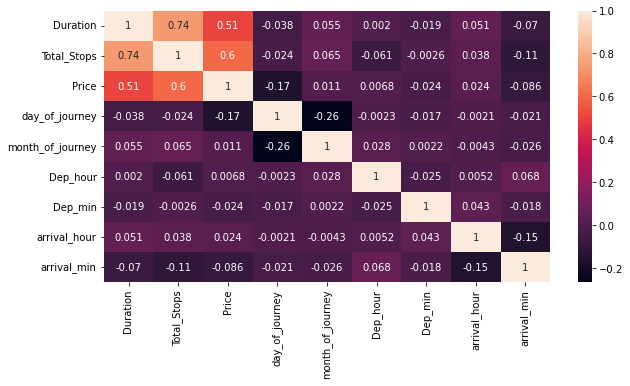

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True);

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,10683.0,643.093232,507.862001,5.0,170.0,520.0,930.0,2860.0
Total_Stops,10683.0,0.824207,0.675199,0.0,0.0,1.0,1.0,4.0
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0
day_of_journey,10683.0,12.682205,8.803701,3.0,5.0,6.0,21.0,27.0
month_of_journey,10683.0,5.534775,2.987489,1.0,3.0,5.0,6.0,12.0
Dep_hour,10683.0,12.490686,5.748650,0.0,8.0,11.0,18.0,23.0
Dep_min,10683.0,24.411214,18.767980,0.0,5.0,25.0,40.0,55.0
arrival_hour,10683.0,13.348778,6.859125,0.0,8.0,14.0,19.0,23.0
arrival_min,10683.0,24.690630,16.506036,0.0,10.0,25.0,35.0,55.0


#### price is main aspect we do tha analysis price point view mostly

In [34]:
df[df["Duration"] == 5.0]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
6474,Air India,2019-06-03,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2023-04-05 16:50:00,2023-04-05 16:55:00,5,2,No info,17327,3,6,16,50,16,55


In [35]:
x=df[(df["Source"] == "Mumbai")&(df["Destination"] == "Hyderabad")&(df["Total_Stops"]==2)]

In [36]:
x["Duration"].mode()

0     255
1     560
2     710
3    1795
4    2245
Name: Duration, dtype: int64

In [37]:
round(x["Duration"].mean(),2)

1101.33

In [38]:
df["Duration"].iloc[6474]=round(x["Duration"].mean(),2)

C:\Users\ad\AppData\Local\Temp\ipykernel_12016\2243611774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Duration"].iloc[6474]=round(x["Duration"].mean(),2)


In [39]:
df.iloc[6474]

Airline                         Air India
Date_of_Journey       2019-06-03 00:00:00
Source                             Mumbai
Destination                     Hyderabad
Route               BOM → GOI → PNQ → HYD
Dep_Time              2023-04-05 16:50:00
Arrival_Time          2023-04-05 16:55:00
Duration                          1101.33
Total_Stops                             2
Additional_Info                   No info
Price                               17327
day_of_journey                          3
month_of_journey                        6
Dep_hour                               16
Dep_min                                50
arrival_hour                           16
arrival_min                            55
Name: 6474, dtype: object

#### Univarite analysis on price.

C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


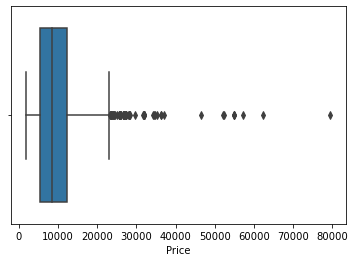

In [40]:
sns.boxplot(df["Price"]);

- mostly price distributed btw 5k to 15k 

####  From the output we can  price has outiyers

(array([6.029e+03, 4.390e+03, 1.820e+02, 6.600e+01, 7.000e+00, 1.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1759. ,  9534.3, 17309.6, 25084.9, 32860.2, 40635.5, 48410.8,
        56186.1, 63961.4, 71736.7, 79512. ]),
 <BarContainer object of 10 artists>)

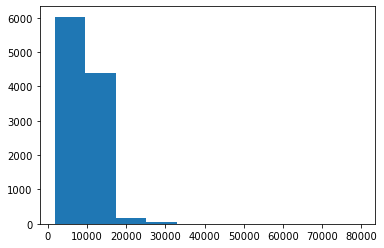

In [41]:
plt.hist(df["Price"])

C:\Users\ad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


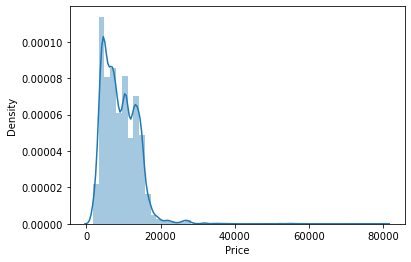

In [42]:
sns.distplot(df["Price"]);

#### Find tha max min and avg price of flight of data.

In [43]:
df["Price"].agg(["mean","max","min"])

mean     9087.064121
max     79512.000000
min      1759.000000
Name: Price, dtype: float64

#### Find tha total number of flights of each company.

In [138]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


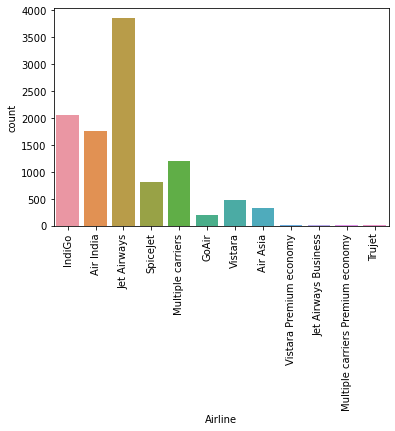

In [44]:
sns.countplot(df["Airline"])
plt.xticks(rotation=90);

- Jet Airways has tha highest of flights.
- Vistara Premium economy   and trujet has less number of flights and trujet has tha one flight only

### how price varies with flight compant: see trend
####  which  flights has cheapest and expensive price

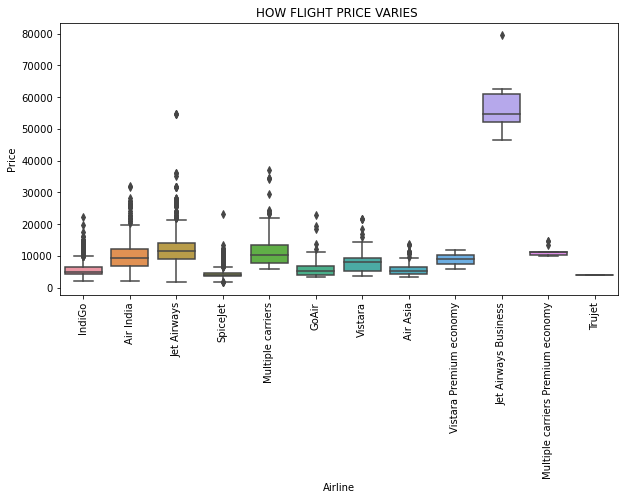

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Airline",y="Price",data=df)
plt.xticks(rotation=90)
plt.title("HOW FLIGHT PRICE VARIES ");

- we can do analysis by  barplot as well but box plot gives tha better

- expensive flights :Jet Airways 
- cheapest flight: trujet

#### Find details of expensive flight

In [46]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [47]:
df[df["Airline"] == "Jet Airways Business"]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
657,Jet Airways Business,2019-01-03,Banglore,Banglore,BLR → BOM → DEL,2023-04-05 05:45:00,2023-04-05 10:45:00,300.0,1,No info,52229,3,1,5,45,10,45
2924,Jet Airways Business,2019-01-03,Banglore,Cochin,BLR → BOM → DEL,2023-04-05 05:45:00,2023-04-05 11:25:00,340.0,1,Business class,79512,3,1,5,45,11,25
5372,Jet Airways Business,2019-01-03,Banglore,Cochin,BLR → BOM → DEL,2023-04-05 05:45:00,2023-04-05 12:25:00,400.0,1,Business class,62427,3,1,5,45,12,25
7351,Jet Airways Business,2019-03-03,Delhi,Cochin,DEL → ATQ → BOM → COK,2023-04-05 20:05:00,2023-03-04 04:25:00,500.0,2,No info,46490,3,3,20,5,4,25
9715,Jet Airways Business,2019-06-03,Delhi,Cochin,DEL → ATQ → BOM → COK,2023-04-05 20:05:00,2023-03-07 04:25:00,500.0,2,No info,52285,3,6,20,5,4,25
10364,Jet Airways Business,2019-01-03,Banglore,Cochin,BLR → MAA → DEL,2023-04-05 09:45:00,2023-04-05 14:25:00,280.0,1,Business class,57209,3,1,9,45,14,25


#### find details of cheapest flight

In [48]:
df[df["Airline"]=="Trujet"]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
2878,Trujet,2019-06-03,Mumbai,Hyderabad,BOM → NDC → HYD,2023-04-05 13:05:00,2023-04-05 16:20:00,195.0,1,No info,4140,3,6,13,5,16,20


#### How many flights with respect to their stopages.

In [49]:
df["Total_Stops"].value_counts()

1    5626
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [50]:
df[df["Total_Stops"]==4]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
9182,Air India,2019-01-03,Banglore,Cochin,BLR → CCU → BBI → HYD → VGA → DEL,2023-04-05 05:50:00,2023-03-02 11:20:00,1770.0,4,Change airports,17686,3,1,5,50,11,20


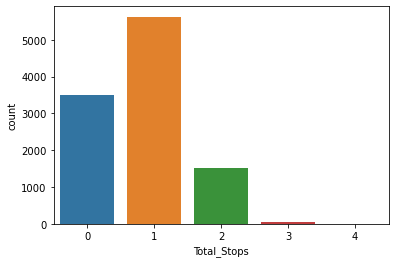

In [51]:
sns.countplot(x="Total_Stops",data=df);

## from above output we can say that maxm stop are 1 and 3 and 4 stop are less

In [52]:
df.groupby(["Total_Stops"])["Airline"].value_counts()

Total_Stops  Airline                          
0            IndiGo                               1241
             SpiceJet                              670
             Jet Airways                           623
             Air India                             417
             Vistara                               264
             Air Asia                              181
             GoAir                                  92
             Vistara Premium economy                 3
1            Jet Airways                          2535
             Multiple carriers                    1145
             IndiGo                                793
             Air India                             541
             Vistara                               215
             SpiceJet                              148
             Air Asia                              129
             GoAir                                 102
             Multiple carriers Premium economy      13
             Jet A

#### Find tha flights with respect to stopes

In [53]:
df.groupby(["Airline"])["Total_Stops"].agg(["min","max","mean"]).sort_values(by="min")

,min,max,mean
Airline,,,
Air Asia,0,2,0.460815
Air India,0,4,1.237443
GoAir,0,1,0.525773
IndiGo,0,2,0.404774
Jet Airways,0,2,1.017667
SpiceJet,0,1,0.180929
Vistara,0,1,0.448852
Vistara Premium economy,0,0,0.000000
Jet Airways Business,1,2,1.333333


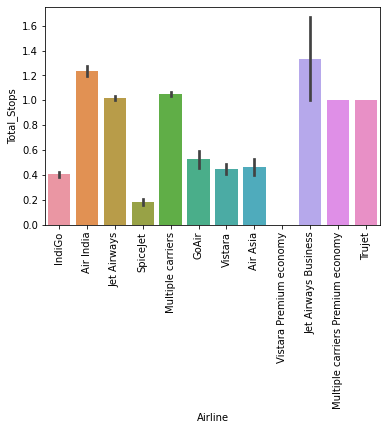

In [54]:
sns.barplot(x="Airline",y="Total_Stops",data=df)
plt.xticks(rotation=90);

In [136]:
df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [116]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [117]:
x=df["Airline"].value_counts().reset_index()
x

,index,Airline
0,Jet Airways,3849
1,IndiGo,2053
2,Air India,1752
3,Multiple carriers,1196
4,SpiceJet,818
5,Vistara,479
6,Air Asia,319
7,GoAir,194
8,Multiple carriers Premium economy,13
9,Jet Airways Business,6


#### Find  maximum , min and sum price

In [55]:
df["Price"].agg(["max","min","sum"])

max       79512
min        1759
sum    97077106
Name: Price, dtype: int64

In [56]:
x=df[df["Destination"]=="New Delhi"].head()
x

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-04-05 22:20:00,2023-03-22 01:10:00,170.0,0,No info,3897,24,3,22,20,1,10


In [57]:
df.groupby(["Destination"])["Price"].sum()

Destination
Banglore     32271247
Cochin       57133054
Hyderabad     5123825
Kolkata       2545083
New Delhi        3897
Name: Price, dtype: int64

In [58]:
## 

x=df[df["Additional_Info"]=="In-flight meal not included"]
x.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
6,Jet Airways,2019-12-03,Banglore,Banglore,BLR → BOM → DEL,2023-04-05 18:55:00,2023-03-13 10:25:00,930.0,1,In-flight meal not included,11087,3,12,18,55,10,25
8,Jet Airways,2019-12-03,Banglore,Banglore,BLR → BOM → DEL,2023-04-05 08:55:00,2023-03-13 10:25:00,1530.0,1,In-flight meal not included,11087,3,12,8,55,10,25
13,Jet Airways,2019-09-05,Kolkata,Banglore,CCU → BOM → BLR,2023-04-05 21:10:00,2023-05-10 09:20:00,730.0,1,In-flight meal not included,9663,5,9,21,10,9,20
17,Jet Airways,2019-12-06,Delhi,Cochin,DEL → BOM → COK,2023-04-05 14:00:00,2023-06-13 12:35:00,1355.0,1,In-flight meal not included,10262,6,12,14,0,12,35
19,Jet Airways,2019-05-27,Delhi,Cochin,DEL → BOM → COK,2023-04-05 16:00:00,2023-05-28 12:35:00,1235.0,1,In-flight meal not included,12898,27,5,16,0,12,35


#### Variaton of flight price frim source.

C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


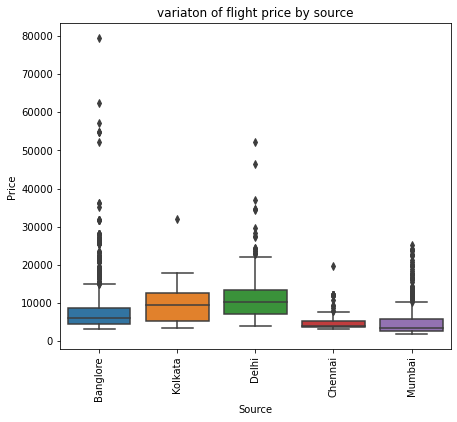

In [59]:
plt.figure(figsize=(7,6))
sns.boxplot(df["Source"],df["Price"],data=df)
plt.xticks(rotation=90)
plt.title("variaton of flight price by source");#box plot used to do distribution

#### Variation price for destination

C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


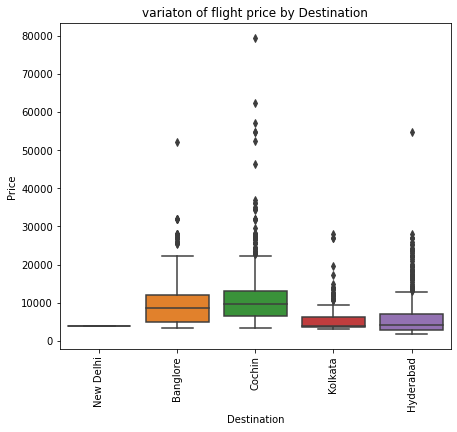

In [61]:
plt.figure(figsize=(7,6))
sns.boxplot(df["Destination"],df["Price"],data=df)
plt.xticks(rotation=90)
plt.title("variaton of flight price by Destination");

### on which month have maxm flights take off?

<AxesSubplot:xlabel='month_of_journey', ylabel='count'>

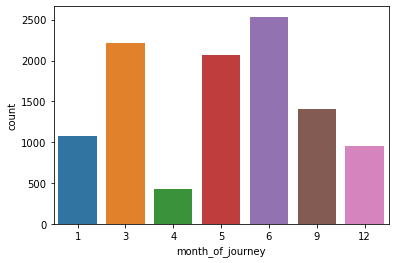

In [62]:
sns.countplot(x="month_of_journey",data=df)

#### Peak busines month

<AxesSubplot:xlabel='month_of_journey', ylabel='Price'>

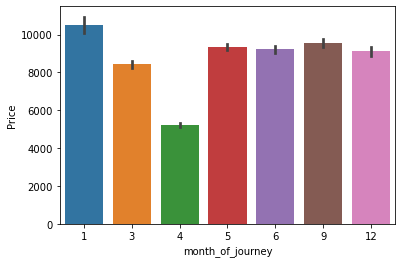

In [89]:
sns.barplot(x='month_of_journey',y='Price',data=df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

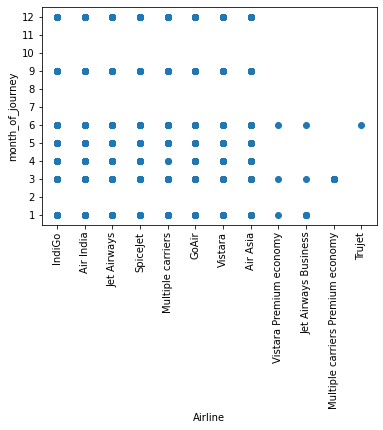

In [70]:
'''which flights take off in which month'''
plt.scatter(df['Airline'],df['month_of_journey'])
plt.xticks(rotation=90)
plt.ylabel('month_of_journey')
plt.xlabel('Airline')
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xticks()

#### How many flights take of in each month

In [73]:
df.groupby('month_of_journey')['Airline'].value_counts()

month_of_journey  Airline          
1                 Jet Airways          430
                  Air India            197
                  IndiGo               184
                  SpiceJet              76
                  Multiple carriers     75
                                      ... 
12                Multiple carriers     65
                  SpiceJet              54
                  Vistara               52
                  Air Asia              29
                  GoAir                 12
Name: Airline, Length: 64, dtype: int64

#### Find peak day

In [74]:
df['day_of_journey'].value_counts

<bound method IndexOpsMixin.value_counts of 0        24
1         5
2         6
3         5
4         3
         ..
10678     4
10679    27
10680    27
10681     3
10682     5
Name: day_of_journey, Length: 10683, dtype: int64>

- 6 th  was tha peak day when passenger travelled most


#### what was tha peak departure time

In [75]:
df['Dep_hour'].value_counts()

9     916
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: Dep_hour, dtype: int64

#### find out tha peak departure hour for different flight

In [77]:
df.groupby(['Airline'])['Dep_hour'].value_counts()

Airline                  Dep_hour
Air Asia                 7           53
                         22          39
                         19          37
                         16          33
                         23          33
                                     ..
Vistara                  10           1
                         12           1
Vistara Premium economy  7            1
                         11           1
                         16           1
Name: Dep_hour, Length: 149, dtype: int64

#### find tha peak departure hour for tha flight take off at following location'''


C:\Users\ad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


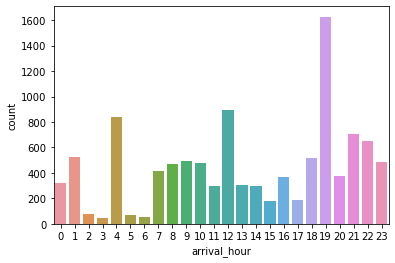

In [96]:
'''find tha peak arrival time'''
sns.countplot(df['arrival_hour']);